# IBM Supervised Learning: Exploratory Data Analysis and Statistics- reviewed Final Project | Insurance Charges Prediction

**<font color=##c3db0b> By Junaid Latif </font>**

**In this notebooks we'll cover the following concepts on a supermarket sales dataset**

- <font color=#0b5bdb>  Data Retrieving </font>
- <font color=#0b5bdb>  Dataset Summary </font>
- <font color=#0b5bdb>  EDA + Data Cleaning</font>
- <font color=#0b5bdb>  Feature Engineering </font>
- <font color=#0b5bdb>  Hypothesis Testing </font>
- <font color=#0b5bdb>  Dataset Conclusion </font>


## **Data Retrieving** 

In [112]:
import numpy as np 
import pandas as pd 
# import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [113]:
# dataset path
file_path = 'data/insurance.csv'

# reading our dataset as a dataframe
df_insurance = pd.read_csv(file_path)

# taking a first look on our data
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Dataset Summary** 

Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

***Features***
- <font>  **age:** age of customer | patient</font>
- <font>  **sex:** male-female </font>
- <font>  **bmi:** body mass index</font>
- <font>  **children:** number of children</font>
- <font>  **region:** residential area  </font>
- <font>  **charges:** insurance charges </font>

## **EDA + Data Cleaning**

In [114]:
# num of rows x num of columns
print('Dataset Dimensions:',df_insurance.shape)

print('----------------------------------------')

# creating a list of columns
print('Columns List: \n')
print(df_insurance.columns.tolist())

print('----------------------------------------')
# types of each column
print(df_insurance.dtypes)

Dataset Dimensions: (1338, 7)
----------------------------------------
Columns List: 

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
----------------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


<font color=#0b5bdb>**1. Converting 'Date' and 'Time' datatype from object to datetime**</font>

<font color=#c3db0b>**Note*. Unfortunately we dont have date and time columns data so here we use a different dateset to Converting 'Date' and 'Time' datatype from object to datetime**</font>

In [181]:
# dataset path
file_path = 'data/supermarket_sales.csv'

# reading our dataset as a dataframe
df_sales = pd.read_csv(file_path)

# taking a first look on our data
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [182]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Date'].dtype

dtype('<M8[ns]')

In [183]:
# splitting the Date column into 3 columns 
df_sales['Day'] = (df_sales['Date']).dt.day
df_sales['Month'] = (df_sales['Date']).dt.month
df_sales['Year'] = (df_sales['Date']).dt.year


In [184]:
df_sales["Time"]= pd.to_datetime(df_sales["Time"])
df_sales['Time'].dtype

dtype('<M8[ns]')

In [185]:
# splitting the Time column into 2 columns 
df_sales['Hour'] = pd.to_datetime(df_sales['Time'], format='%H:%M').dt.hour
df_sales['Minute'] = pd.to_datetime(df_sales['Time'], format='%H:%M').dt.minute


In [186]:
# Finally we drop Date and Time Columns
df_sales.drop(['Date', 'Time'], axis=1, inplace=True)

In [187]:
df_sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10,37


<font color=#0b5bdb>**2. Checking for null values**</font>

In [115]:
df_insurance.isnull().sum() # To check null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Note: as shown above there are no null values in our dataset!**

In case we found null values there are three methods we can approach:
- 1. Removing 
- 2. Imputing
- 3. Masking

**Below I show some examples:**

In [116]:
# Imputaion by average value (Mean!)
avg_charges = df_insurance["charges"].astype("float").mean(axis=0)
df_insurance["charges"].replace(np.nan, avg_charges, inplace=True)

# Imputation by most frequent (Mode!):
from scipy import stats
mode=stats.mode(df_insurance['children'])
df_insurance['children'].replace(np.nan, "mode", inplace=True)

# Removing rest or remanining values
#df_insurance.dropna(inplace=True)

# check again for null values:
df_insurance.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<font> Great, there is no missing values within our features !</font>


In [117]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<font color=#0b5bdb>**3. Showing the range and median of numerical columns**</font>

In [118]:
# Select just the rows desired from the 'describe' method and add in the 'median'
insurance_X = df_insurance.describe()
insurance_X.loc['range'] = insurance_X.loc['max'] - insurance_X.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
insurance_X = insurance_X.loc[out_fields]
insurance_X.rename({'50%': 'median'}, inplace=True)
insurance_X

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422265
25%,27.000000,26.296250,0.000000,4740.287150
median,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
range,46.000000,37.170000,5.000000,62648.554110


<font color=#0b5bdb>**4. List of all categorical data in our data set**</font>

In [119]:
categorical_columns = [colname for colname in df_insurance.columns if df_insurance[colname].dtype == "object"]
categorical_columns

['sex', 'smoker', 'region']

In [120]:
for col in categorical_columns:
    print("# unique values in '{0}': {1}".format(col, len(df_insurance[col].unique().tolist())))

# unique values in 'sex': 2
# unique values in 'smoker': 2
# unique values in 'region': 4


<font color=#0b5bdb>**5. Calculating mean of the numerical columns based on grouping by categorical columns**</font>

In [121]:
df_insurance.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [122]:
df_insurance.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [123]:
df_insurance.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


<font color=#0b5bdb>**6. Data Visualization.**</font>

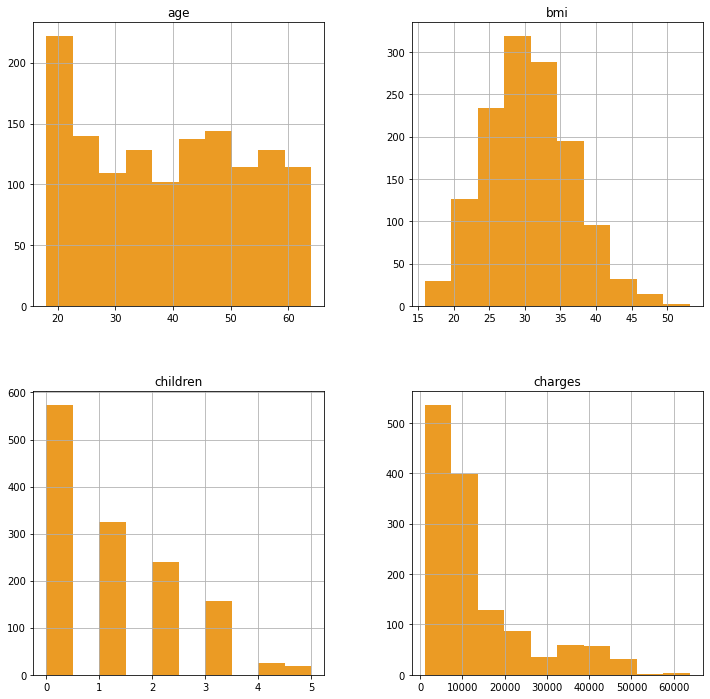

In [124]:
# Plotting Histogram for all numeric features
df_insurance.hist(figsize=(12,12), color='#eb9b24')
plt.show()

Gender Female - 676
Gender Male - 662


c:\Users\Junaid\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


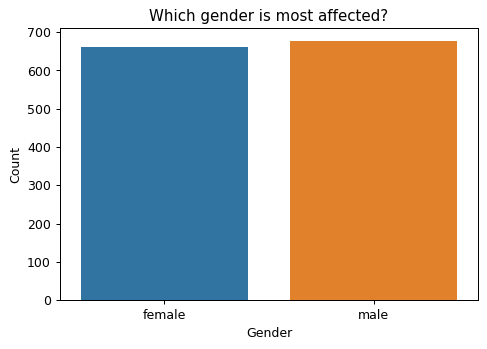

In [125]:
# Branch Count
plt.figure(dpi=90)
sns.countplot(df_insurance['sex'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Which gender is most affected?')
female,male =df_insurance.sex.value_counts()

print('Gender Female -',female)
print('Gender Male -',male)


Smoker No - 1064
Smoker Yes - 274


c:\Users\Junaid\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


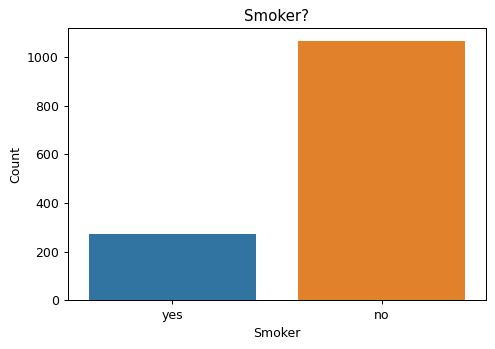

In [126]:
# Branch Count
plt.figure(dpi=90)
sns.countplot(df_insurance['smoker'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker?')
no,yes =df_insurance.smoker.value_counts()

print('Smoker No -',no)
print('Smoker Yes -',yes)

Region northeast - 364
Region northwest - 325
Region southeast - 325
Region southwest - 324


c:\Users\Junaid\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


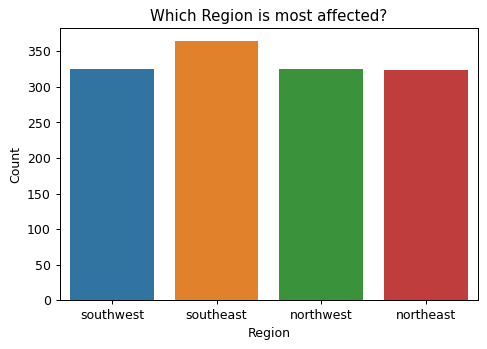

In [127]:
# Branch Count
plt.figure(dpi=90)
sns.countplot(df_insurance['region'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Which Region is most affected?')
northeast,northwest,southeast,southwest=df_insurance.region.value_counts()

print('Region northeast -',northeast)
print('Region northwest -',northwest)
print('Region southeast -',southeast)
print('Region southwest -',southwest)


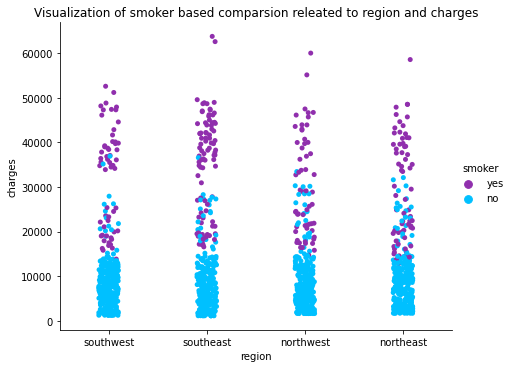

In [128]:
sns.catplot(x='region',y='charges',hue='smoker',data=df_insurance, aspect=1.3 ,  palette = sns.color_palette(['#902fad', '#00c0ff']))
plt.xlabel('region')
plt.ylabel('charges')
plt.title('Visualization of smoker based comparsion releated to region and charges')
plt.show()

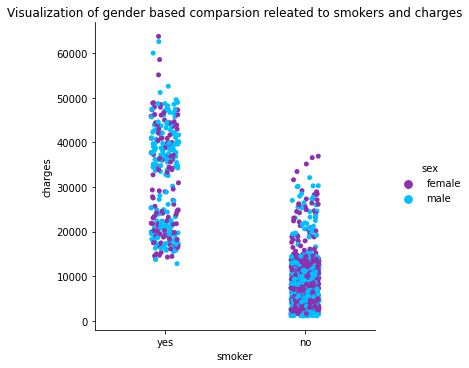

In [129]:
sns.catplot(x='smoker',y='charges',hue='sex',data=df_insurance, palette = sns.color_palette(['#902fad', '#00c0ff']))
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('Visualization of gender based comparsion releated to smokers and charges')
plt.show()

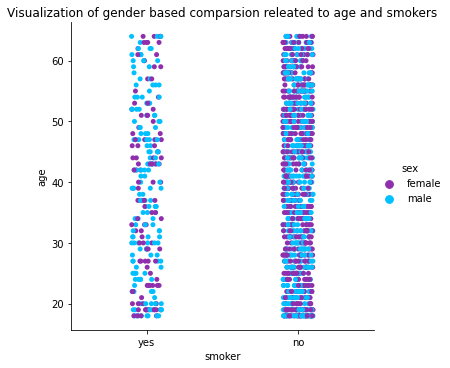

In [130]:
sns.catplot(x='smoker',y='age',hue='sex',data=df_insurance, palette = sns.color_palette(['#902fad', '#00c0ff']))
plt.xlabel('smoker')
plt.ylabel('age')
plt.title('Visualization of gender based comparsion releated to age and smokers')
plt.show()

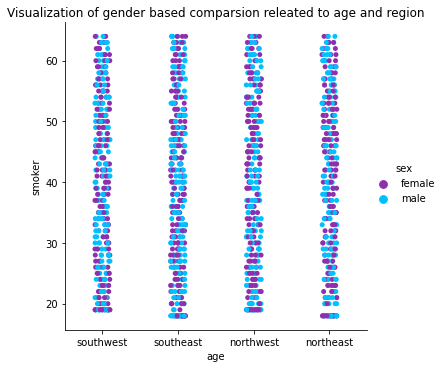

In [131]:
sns.catplot(x='region',y='age',hue='sex',data=df_insurance, palette = sns.color_palette(['#902fad', '#00c0ff']))
plt.xlabel('age')
plt.ylabel('smoker')
plt.title('Visualization of gender based comparsion releated to age and region')
plt.show()

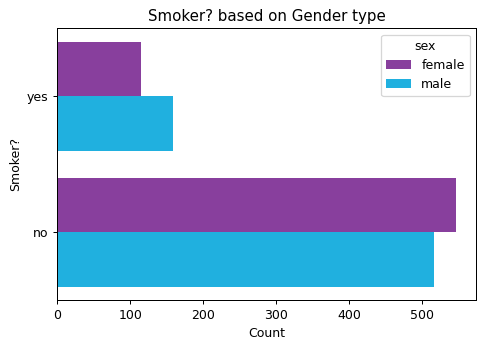

In [132]:
plt.figure(dpi=90)
sns.countplot(y ='smoker', hue = "sex", data = df_insurance, palette = sns.color_palette(['#902fad', '#00c0ff'])) 
plt.xlabel('Count')
plt.ylabel('Smoker?')
plt.title('Smoker? based on Gender type')
plt.show()

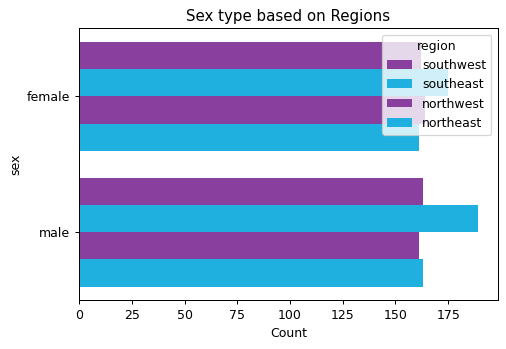

In [133]:
plt.figure(dpi=90)
sns.countplot(y ='sex', hue = "region", data = df_insurance, palette = sns.color_palette(['#902fad', '#00c0ff'])) 
plt.xlabel('Count')
plt.ylabel('sex')
plt.title('Sex type based on Regions')
plt.show()

## **Feature Engineering**

In [134]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<font color=#0b5bdb>**1. Finding the correlations between the features.**</font>

In [135]:
# display the correlations 
np.round(df_insurance.corr(),2)

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


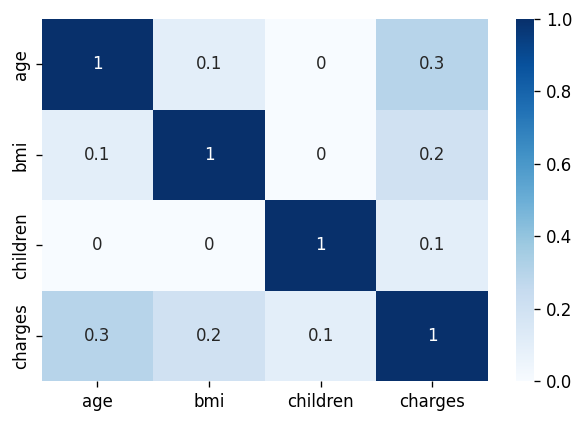

In [136]:
plt.figure(dpi=120)
sns.heatmap(np.round(df_insurance.corr(),1),annot=True, cmap="Blues")
plt.show()

**There is very less correlations:
- Charges and age : 0.3
- charges and bmi : 0.2
- Others have no relationship

**<font color=#0b5bdb>2. One-hot encoding for dummy variables:</font>**

In [137]:
df_insurance.select_dtypes('number')

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [138]:
df_insurance.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [139]:
# # dropping "any" column if no need for this column
# df_insurance.drop(['any'], axis=1, inplace=True)

In [140]:
categorical_cols = df_insurance.dtypes[df_insurance.dtypes == np.object] 
categorical_cols_list = categorical_cols.index.to_list()
categorical_cols_list

C:\Users\Junaid\AppData\Local\Temp\ipykernel_16676\904143731.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = df_insurance.dtypes[df_insurance.dtypes == np.object]


['sex', 'smoker', 'region']

In [141]:
df_insurance[categorical_cols_list].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [142]:
df_insurance[categorical_cols_list].head().T

,0,1,2,3,4
sex,female,male,male,male,male
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest


In [143]:
# One-hot encoding the dummy variables:
df_insurance = pd.get_dummies(df_insurance, columns=categorical_cols_list, drop_first=True)
df_insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


As shown above we ended up with a new data set with 9 columns 

**<font color=#0b5bdb>3. Log transforming skew variables</font>**

In [144]:
# Create a list of float colums to check for skewing
mask = df_insurance.dtypes == np.float
float_cols = df_insurance.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df_insurance[float_cols].skew()
skew_vals

C:\Users\Junaid\AppData\Local\Temp\ipykernel_16676\617268530.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = df_insurance.dtypes == np.float


bmi        0.284047
charges    1.515880
dtype: float64

In [145]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
charges,1.51588


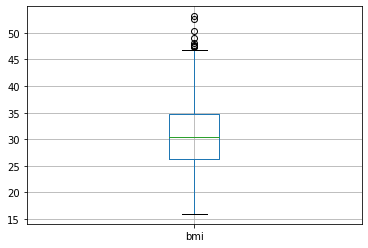

In [146]:
# box plot to see outliers
df_insurance.boxplot(column='bmi')
plt.show()


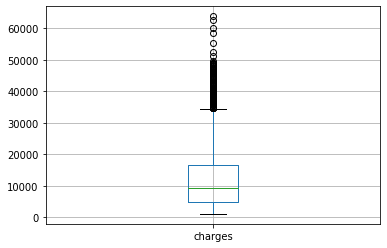

In [147]:
df_insurance.boxplot(column='charges')
plt.show()


c:\Users\Junaid\anaconda3\envs\streamlit\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


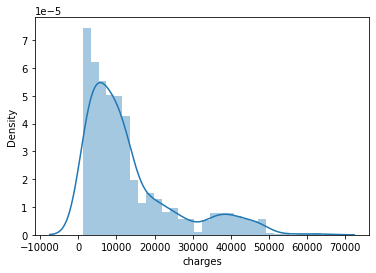

In [148]:
# dist plot to see outliers (The distplot represents the univariate distribution of data)
sns.distplot(df_insurance['charges'])
plt.show()

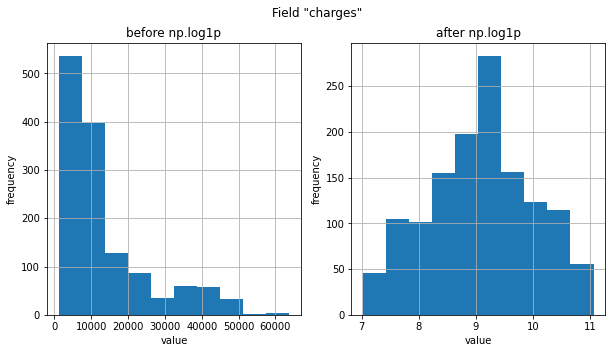

In [149]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "charges"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df_insurance[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df_insurance[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [150]:
# Perform the skew transformation: If we have more than one skewed columns for to transformation
for col in skew_cols.index.values:
    if col == "charges":
        continue
    df_insurance[col] = df_insurance[col].apply(np.log1p)

**<font color=#0b5bdb>4. Features Selection</font>**

*The Features we picked accordingly to the heat map which represents the best corellations*

In [153]:
smallest_df_insurance =df_insurance.loc[:,['age', 'bmi', 'charges']]

In [154]:
smallest_df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Pair plot of features**


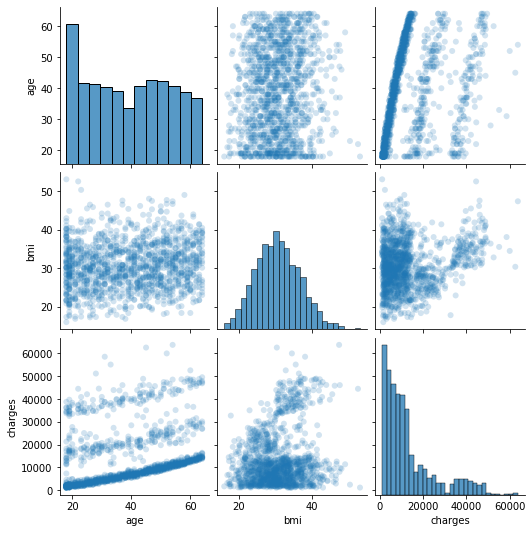

In [155]:
sns.pairplot(smallest_df_insurance, plot_kws=dict(alpha=.2, edgecolor='none'))

In [156]:
#Separate our features from our target

# Features
X = smallest_df_insurance.iloc[:, :-1]
# Target
y = smallest_df_insurance['charges']

In [157]:
X.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


**<font color=#0b5bdb>5. Polynomial Features</font>**

In [158]:
# Take a copy to prevent data deterioration
X2 = X.copy()

X2['age2'] = X2['age'] ** 2
X2['bmi2'] = X2['bmi'] ** 2


**<font color=#0b5bdb>6. Feature interactions</font>**

In [159]:
# Take a copy to prevent data deterioration
X3 = X2.copy()

# multiplicative interaction
X3['age_x_bmi'] = X3['age'] * X3['bmi']

# division interaction
X3['age_/_bmi'] = X3['bmi'] / X3['bmi']

**<font color=#0b5bdb>7. Polynomial Features in Scikit-Learn</font>**


In [160]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures

In [161]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [162]:
features = ['age', 'bmi']
pf.fit(df_insurance[features])

PolynomialFeatures()

In [163]:
pf.get_feature_names()

c:\Users\Junaid\anaconda3\envs\streamlit\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [164]:
feat_array = pf.transform(df_insurance[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

c:\Users\Junaid\anaconda3\envs\streamlit\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,age,bmi,age^2,age bmi,bmi^2
0,1.0,19.0,27.900,361.0,530.100,778.410000
1,1.0,18.0,33.770,324.0,607.860,1140.412900
2,1.0,28.0,33.000,784.0,924.000,1089.000000
3,1.0,33.0,22.705,1089.0,749.265,515.517025
4,1.0,32.0,28.880,1024.0,924.160,834.054400
...,...,...,...,...,...,...
1333,1.0,50.0,30.970,2500.0,1548.500,959.140900
1334,1.0,18.0,31.920,324.0,574.560,1018.886400
1335,1.0,18.0,36.850,324.0,663.300,1357.922500
1336,1.0,21.0,25.800,441.0,541.800,665.640000


## **Hypothesis Testing**

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 350` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.



**Null:** I'm not special; my true rate of the comming customer's gender prediction is 0.5. 

But even under this hypothesis, I could get `[170, 180, 195]` respectively out of `350` right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of the comming customer's gender prediction is greater than `0.5`.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct gender predictions out of `350`.

In [ ]:
# Hypothesis 1.0: Null: I could get 150 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(170, 350, 0.5)

print(str(round(prob*100, 1))+"%")

68.5%


The probability of getting 150 or more correct is about 68.5%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't haven mystical powers.


In [ ]:
# Hypothesis 1.0: Null: I could get 180 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(180, 350, 0.5)

print(str(round(prob*100, 1))+"%")

27.8%


The probability of getting 180 or more correct is about 27.8%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't haven mystical powers.


In [ ]:
# Hypothesis 1.0: Null: I could get 195 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(195, 350, 0.5)

print(str(round(prob*100, 1))+"%")

1.4%


The probability of getting 195 or more correct is about 1.4%. This is less than 5%, so we can reject the null and conclude that I (probably) haven mystical powers.


**Find the number of comming customer's gender a person would need to guess correctly for us to believe they're clairvoyant.**


In [ ]:
from scipy.stats import binom
print(binom.ppf(0.95,350,0.5)+1)

191.0


## **Dataset Summary**

Generally, this dataset was so intersing for me to explore and to apply  most majority of what I have learned so far through this course but in mainly the quality of the data is not so good we need more inforamtive data.